In [129]:
from deap import tools, creator, base, algorithms
import numpy
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

points = []
mean = 0.0
model_coef = []

#Rosenbrock z = (a-x)**2 + B(y-x**2)**2
a = 1
b = 100
def rosenbrocke(x,y):
    return (a-x)**2 + b*(y-x**2)**2

def rosenbrock():
    x = random.randint(-10,10)
    y = random.randint(-10,10)
    z = (a-x)**2 + b*(y-x**2)**2
    return (x,y,z)

In [130]:
def quadratic3d(coef):
        x = point[0]
        y = point[1]
        return coef[0]*(x**2) + coef[1]*(y**2) + coef[2]*x + coef[3]*y + coef[4]
    
def quadratic3de(x,y):
    return model_coef[0]*(x**2) + model_coef[1]*(y**2) + model_coef[2]*x + model_coef[3]*y + model_coef[4]

def quadratic2d(coef):
        x = point[0]
        return coef[0]*(x**2) + coef[1]*x + coef[2]

def test_regress(coef):
    SSres = 0 
    SStot = 0

    for point in points:        
        zi = quadratic3d(coef)
        SSres = SSres + (point[2] - zi)**2
        SStot = SStot + (point[2] - mean)**2

    err = SSres/SStot

    return (err,)

In [131]:
def test_min(coords):
    return (quadratic3de(coords[0],coords[1]),)

In [139]:
def model ():
    creator.create("bestFit", base.Fitness, weights = (-1.0,))
    creator.create("Individual",list,fitness=creator.bestFit)

    toolbox = base.Toolbox()
    toolbox.register("Coeff",random.uniform,-30,30)
    toolbox.register("individual",tools.initRepeat,creator.Individual,toolbox.Coeff, 5) 
    toolbox.register("population",tools.initRepeat,list,toolbox.individual, n = 50)
    toolbox.register("evaluate",test_regress)

    toolbox.register("mate",tools.cxBlend,alpha=.5)
    toolbox.register("mutate",tools.mutGaussian,mu=0,sigma=1,indpb=.5)
    toolbox.register("select", tools.selTournament,tournsize =3)
    toolbox.register("map",map)

    cxprob, mutprob, ngens = 0.5,0.1,100
    pop = toolbox.population()
    ind = toolbox.individual()
    hof = tools.HallOfFame(1)
    pop = algorithms.eaMuCommaLambda(pop, toolbox,10,50, cxprob, mutprob, ngens,halloffame = hof, verbose = 0)
    return hof[0]

In [133]:
def findMin():
    creator.create("bestFit", base.Fitness, weights = (-1.0,))
    creator.create("Individual",list,fitness=creator.bestFit)

    toolbox = base.Toolbox()
    toolbox.register("coord",random.uniform,-10,10)
    toolbox.register("individual",tools.initRepeat,creator.Individual,toolbox.coord, 2) 
    toolbox.register("population",tools.initRepeat,list,toolbox.individual, n = 50)
    toolbox.register("evaluate",test_min)

    toolbox.register("mate",tools.cxBlend,alpha=.5)
    toolbox.register("mutate",tools.mutGaussian,mu=0,sigma=1,indpb=.5)
    toolbox.register("select", tools.selTournament,tournsize =3)
    toolbox.register("map",map)

    cxprob, mutprob, ngens = 0.5,0.1,100
    pop = toolbox.population()
    ind = toolbox.individual()
    hof = tools.HallOfFame(1)
    pop = algorithms.eaMuCommaLambda(pop, toolbox,10,50, cxprob, mutprob, ngens,halloffame = hof, verbose = 0)
    return hof[0]

[-0.4517219819948596, -0.0904009883771105]
[0.6402610830595936, 1.2412291802159987]
[-0.6646191833159885, -0.43143554216319946]
[2.2085531674585455, -0.38178921858932086]
[-0.9603193807706388, -57.48468534779475]
[-0.5671045398636181, 0.10234391381073385]
[1.9267768814677875, -1.744221466252988]
[-0.5563858182131519, 0.356829353333903]
[1.2716461070458807, -0.5438838576879137]
[-0.4077515253020382, 0.47085069065664975]


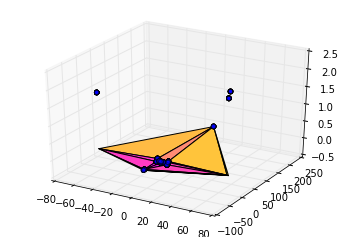

In [140]:
random.seed(10)
xi,yi,zi,mi = [],[],[],[] #empty lists for plotting

#getting data
for i in range(10):
    points.append(rosenbrock())
    
fig = plt.figure()
#end setting up, begin main 
for i in range(10):
    mean = 0
    for point in points:
        mean = mean + point[2]

    mean = mean/len(points)

    model_coef = model() #GA
    #c = (X^t * X)^-1 * X^t * y

    #plotting
    plt.clf()
    for point in points:
        xi.append(point[0])
        yi.append(point[1]) 
        zi.append(point[2])
        mi.append(quadratic3de(point[0],point[1]))


    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(xi,yi,zi)
    ax.plot_trisurf(xi,yi,mi,cmap=cm.spring)

    newmin = findMin()
    print newmin
    points.append([newmin[0],newmin[1],rosenbrocke(newmin[0],newmin[1])])